# SIMPLE LINEAR REGRESSION


IMPORTING THE REQUIRED LIBRARIES WHICH WILL BE REQUIRED

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

READING THE DATA

In [42]:
data = pd.read_csv('Salary_Data[1].csv')

CHECKING IF THE DATA IS NORMALLY DISTRUBUTED OR NOT

In [43]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


CHECKING THE FIRST FEW RECORDS

In [10]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


CHECKING THE DATA TYPES

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


CHECKING IF NULL VALUE EXISTS OR NOT

In [12]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

CHECKING THE CORRELATION

In [13]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


PLOTTING THE GRAPH

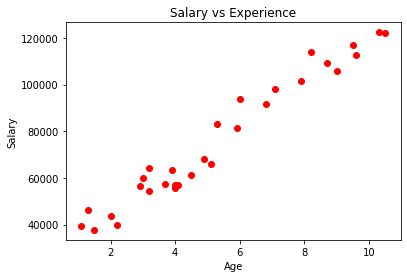

In [27]:
plt.plot(data.YearsExperience, data.Salary, color = 'red')
plt.title('Salary vs Experience')
plt.xlabel('Age')
plt.ylabel()
plt.show()

Plotting the graph with seaborn library

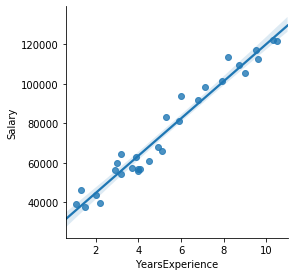

In [38]:
sns.pairplot(data, x_vars='YearsExperience', y_vars='Salary', size=4, aspect=1, kind='reg')
plt.show()

Generating Heatmap

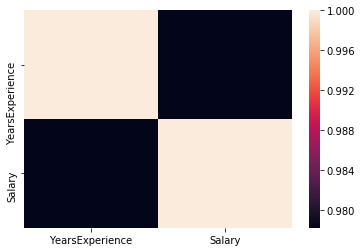

In [39]:
sns.heatmap(data.corr())

Splitting data into Training data and testing data

In [44]:
X=data['YearsExperience']
y=data['Salary']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [50]:
len(y_train)

24

In [53]:
#X_train_scaled=X_train.reshape(-1, 1)
#Got error in above line 'Series' object has no attribute 'reshape' so converting the data  to array
X_train_scaled=X_train.values.reshape(-1, 1)
y_train_scaled=y_train.values.reshape(-1,1)
X_test_scaled=X_test.values.reshape(-1,1)
y_test_scaled=y_test.values.reshape(-1,1)

Predicting the values

In [54]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print(reg.intercept_)
print(reg.coef_)

[26819.0651187]
[[9361.11639032]]


In [56]:
y_pred = reg.predict(X_test_scaled)

In [57]:
y_pred

array([[ 61455.19576289],
       [115749.67082676],
       [123238.56393901],
       [ 65199.64231902],
       [ 53966.30265063],
       [ 64263.53067999]])

In [58]:
df = pd.DataFrame({'Actual': y_test_scaled.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,57189.0,61455.195763
1,116969.0,115749.670827
2,122391.0,123238.563939
3,57081.0,65199.642319
4,56642.0,53966.302651
5,56957.0,64263.530680


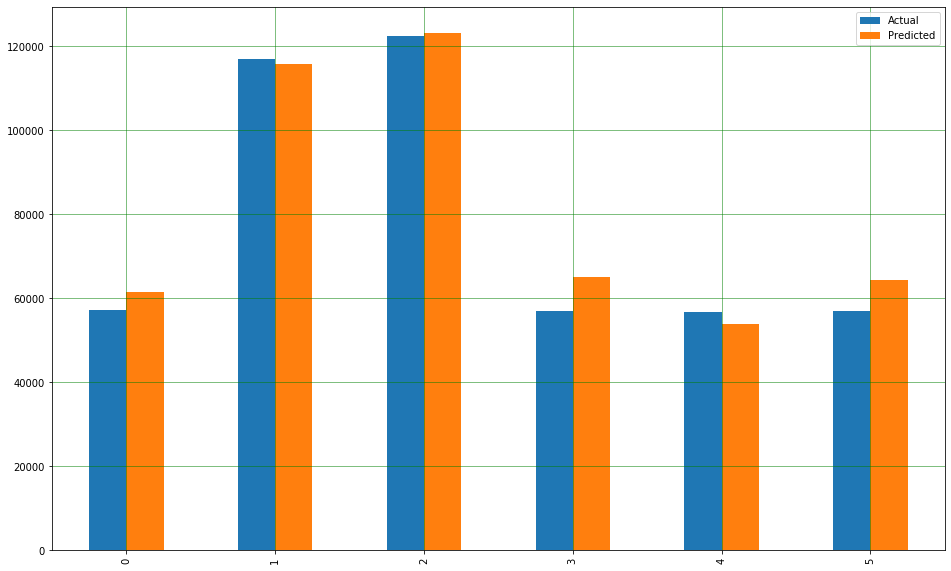

In [59]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

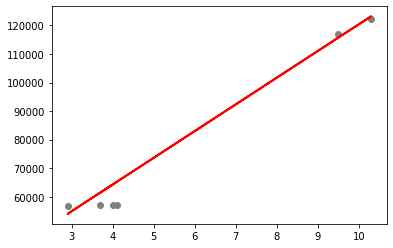

In [69]:
plt.scatter(X_test_scaled, y_test_scaled,  color='gray')
plt.plot(X_test_scaled, y_pred, color='red', linewidth=2)
plt.show()

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_scaled, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_scaled, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_pred)))

Mean Absolute Error: 4072.3265372536903
Mean Squared Error: 24477109.08965574
Root Mean Squared Error: 4947.434596804261


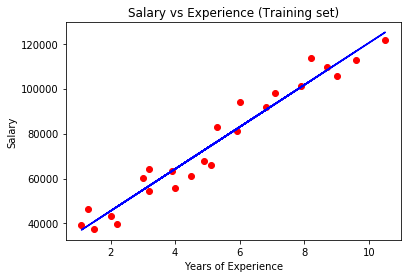

In [65]:
plt.scatter(X_train_scaled, y_train_scaled, color = 'red')
plt.plot(X_train_scaled, reg.predict(X_train_scaled), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

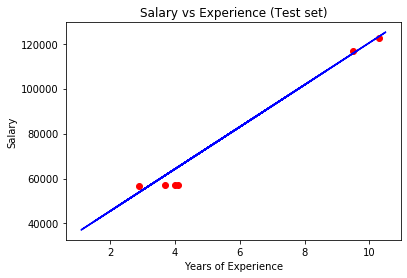

In [66]:
# Visualising the Test set results
plt.scatter(X_test_scaled, y_test_scaled, color = 'red')
plt.plot(X_train_scaled, reg.predict(X_train_scaled), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()